In [ ]:
# Los datos: EXPLORACIÓN Y LIMPIEZA
# 1. Customer flight Analisys.csv (actividad de vuelo de los clientes)
# 2. Customer Loyalty History.csv (perfil de los clientes)
# Ejercicio:
# FASE 1 - EXPLORACIÓN Y LIMPIEZA
# 1.1 Exploracion inicial: nulos, valores atipicos, datos faltantes...(Pandas)
# 1.2 Unión de los conjuntos
# 2.1 Eliminación o imputación de nulos
# 2.2 Verificar consistencia y correlacion
# 2.3 Ajustes y conversiones necesarias para el análisis estadístico

In [3]:
# Impotación de librterias necesarias para el ejercicio
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [4]:
# Lectura de ficheros - Voy a utilizar distintos métodos para el EDA
df_cf = pd.read_csv("files/customer_flight_activity.csv")
df_cf.head() # ver las primeras filas
df_cf.sample(8) # ver filas aleatorias

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
333106,737451,2018,8,0,0,0,0,0.0,0,0
66437,938636,2017,4,0,0,0,0,0.0,0,0
359445,342945,2018,10,0,0,0,0,0.0,0,0
81761,851982,2017,5,0,0,0,0,0.0,0,0
50203,972121,2017,3,7,3,10,3890,389.0,0,0
149783,874161,2017,9,0,0,0,0,0.0,0,0
240436,304887,2018,3,0,0,0,0,0.0,0,0
11740,724378,2017,1,9,0,9,2619,261.0,0,0


In [5]:
df_cl = pd.read_csv("files/customer_loyalty_history.csv")
df_cl.head() # 
df_cl.sample(8) # Me llama la atención que el país es siempre Canadá
df_cl["Country"].unique() # Compruebo que en esa columna solo está Canadá

array(['Canada'], dtype=object)

In [6]:
# Para seguir voy a unificar ambos csv en uno solo. Para ello comprueblo que la columna para realizar esta unión es:
# "Loyalty Number" ya que es compartida por ambos csv y se refiere al identificador del cliente. 
# Aplico el método .merge() que permite combinar 2 DataFrame basándose en una o varias columnas comunes.
df = df_cf.merge(df_cl, how = "inner", on = "Loyalty Number")

In [7]:
df.shape # el tamaño

(405624, 25)

In [10]:
df.columns # Las columnas. Creo que será más ágil cambiarles el nombre para evitar malos entendidos

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [11]:
# Creo una nueva variable con un diccionario con las columnas y su traduccion.
columnas = {
    'Loyalty Number': "ID_fidelidad", 
    'Year': "ano",
    'Month': "mes", 
    'Flights Booked': "total_vuelos_mes",
    'Flights with Companions': "vuelos_con_acompañantes", 
    'Total Flights': "total_vuelos", 
    'Distance': "distancia_total_mes",
    'Points Accumulated': "puntos_acumulados_mes", 
    'Points Redeemed': "puntos_canjeados", 
    'Dollar Cost Points Redeemed': "valor_puntos_canjeados_dollar",
    'Country': "pais", 
    'Province': "provincia", 
    'City': "ciudad", 
    'Postal Code': "codigo_postal", 
    'Gender': "genero", 
    'Education': "estudios",
    'Salary' : "salario", 
    'Marital Status': "estado_civil", 
    'Loyalty Card': "tarjeta_fidelidad" , 
    'CLV': "valor_total_cliente", 
    'Enrollment Type': "inscripcion",
    'Enrollment Year': "alta_año", 
    'Enrollment Month': "alta_mes", 
    'Cancellation Year': "baja_año",
    'Cancellation Month' : "baja_mes"}
# Utilizo el metodo rename para cambiar el nombre de las columnas y compruebo
df.rename(columns= columnas, inplace=True)
df.sample(20)

,ID_fidelidad,ano,mes,total_vuelos_mes,vuelos_con_acompañantes,total_vuelos,distancia_total_mes,puntos_acumulados_mes,puntos_canjeados,valor_puntos_canjeados_dollar,pais,provincia,ciudad,codigo_postal,genero,estudios,salario,estado_civil,tarjeta_fidelidad,valor_total_cliente,inscripcion,alta_año,alta_mes,baja_año,baja_mes
194126,573347,2018,3,0,0,0,0,0.00,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Female,College,NaN,Single,Nova,4700.42,Standard,2018,12,NaN,NaN
247932,707470,2018,1,10,0,10,3010,301.00,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,79766.0,Married,Nova,3942.73,Standard,2012,6,NaN,NaN
151247,465260,2017,11,7,5,12,1164,116.00,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,89817.0,Married,Aurora,5977.79,Standard,2012,11,NaN,NaN
389557,485258,2018,3,3,3,6,1578,169.56,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,55093.0,Married,Star,7685.40,Standard,2017,7,2018.0,3.0
399202,793742,2017,11,9,5,14,1540,154.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,56845.0,Married,Star,4126.61,Standard,2017,7,2018.0,3.0
122601,396920,2017,11,7,5,12,2880,288.00,519,42,Canada,Ontario,Toronto,P1J 8T7,Male,College,NaN,Single,Aurora,18892.20,Standard,2016,5,NaN,NaN
320324,892616,2018,9,8,0,8,2064,206.00,0,0,Canada,Ontario,Toronto,P1L 8X8,Male,Bachelor,56239.0,Married,Star,2839.81,Standard,2017,4,NaN,NaN
70625,270935,2018,8,13,7,20,1760,176.00,0,0,Canada,Alberta,Peace River,T9O 2W2,Female,Bachelor,56870.0,Married,Nova,9422.97,Standard,2013,2,NaN,NaN
330344,918964,2017,9,0,0,0,0,0.00,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,81518.0,Divorced,Nova,5548.03,Standard,2018,8,NaN,NaN
86553,309408,2017,10,2,2,4,908,90.00,0,0,Canada,Ontario,Kingston,M9K 2P4,Female,Bachelor,86793.0,Divorced,Star,3985.55,Standard,2016,10,NaN,NaN


In [12]:
# LIMPIEZA: compruebo si hay filas duplicadas en el df
df.duplicated().sum()

1864

In [13]:
#  # Hay 1864. Las elimino y compruebo (antes 405624/ahora 403760)
df = df.drop_duplicates()
df.shape

(403760, 25)

In [14]:
df.info() # Información sobre el data frame

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID_fidelidad                   403760 non-null  int64  
 1   ano                            403760 non-null  int64  
 2   mes                            403760 non-null  int64  
 3   total_vuelos_mes               403760 non-null  int64  
 4   vuelos_con_acompañantes        403760 non-null  int64  
 5   total_vuelos                   403760 non-null  int64  
 6   distancia_total_mes            403760 non-null  int64  
 7   puntos_acumulados_mes          403760 non-null  float64
 8   puntos_canjeados               403760 non-null  int64  
 9   valor_puntos_canjeados_dollar  403760 non-null  int64  
 10  pais                           403760 non-null  object 
 11  provincia                      403760 non-null  object 
 12  ciudad                         4037

In [15]:
# Examino las columnas con nulos
df.isna().sum()

ID_fidelidad                          0
ano                                   0
mes                                   0
total_vuelos_mes                      0
vuelos_con_acompañantes               0
total_vuelos                          0
distancia_total_mes                   0
puntos_acumulados_mes                 0
puntos_canjeados                      0
valor_puntos_canjeados_dollar         0
pais                                  0
provincia                             0
ciudad                                0
codigo_postal                         0
genero                                0
estudios                              0
salario                          102260
estado_civil                          0
tarjeta_fidelidad                     0
valor_total_cliente                   0
inscripcion                           0
alta_año                              0
alta_mes                              0
baja_año                         354110
baja_mes                         354110


In [16]:
# Para visualizar solo las columnas con nulos
df.isnull().sum()[df.isnull().sum() > 0]

salario     102260
baja_año    354110
baja_mes    354110
dtype: int64

In [24]:
# Examino el porcentaje de nulos que tengo para valorar que hacer con ellos.
# El alto porcentaje de nulos en las bajas indica que siguen activos.

df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0]*100

salario    25.326927
dtype: float64

In [18]:
# Voy llenar los nulos en las bajas con el valor 0, es que siguen activos
df [["baja_año", "baja_mes"]] = df[["baja_año", "baja_mes"]].fillna(0)
df["baja_año"]

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
405619    2017.0
405620    2017.0
405621    2017.0
405622    2017.0
405623    2017.0
Name: baja_año, Length: 403760, dtype: float64

In [19]:
# Los nulos en el salario. Primero voy a inspeccionar esta columna para entender mejor que pasa.
df["salario"].describe()

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salario, dtype: float64

In [20]:
# ¿Por qué hay valores negativos en salario? ¿Es un error o es que deben dinero?
# ¿Cuantos salarios negativos hay?:
df[df["salario"]<0].shape # 480
df[df["salario"]<0].duplicated().sum() # 0

0

In [21]:
# Salario negativo.
# Tras una inspección de los datos y antes de imputar me aventuro con 3 hipótesis sobre el salario negativo.
# 1.salario negativo relacionado con el valor_total_cliente
# 2.salario negativo relacionado con exceso de puntos canjeados
# 3.salario negativo por error en la transcripción (solucionable con pasarlo a positivo) 
# (En mi razonamiento, creo que puede ser lógico que haya mucohs nulos en el salario ya que es un dato complicado de conseguir)
# por eso es extraño que existan 480 en negativo.

In [22]:
# Filtrar los datos con salario negativo
salarios_negativos = df[df['salario'] < 0]

# Hipótesis 1: Relación con el valor_total_cliente
# Comparar el valor total del cliente para los salarios negativos vs positivos
valor_cliente_neg = salarios_negativos['valor_total_cliente'].mean()
valor_cliente_pos = df[df['salario'] >= 0]['valor_total_cliente'].mean()

print(f"Valor total cliente promedio con salario negativo: {valor_cliente_neg}")
print(f"Valor total cliente promedio con salario positivo: {valor_cliente_pos}")

# Hipótesis 2: Relación con exceso de puntos canjeados
# Comparar los puntos canjeados para los salarios negativos vs positivos
puntos_canjeados_neg = salarios_negativos['puntos_canjeados'].mean()
puntos_canjeados_pos = df[df['salario'] >= 0]['puntos_canjeados'].mean()

print(f"Puntos canjeados promedio con salario negativo: {puntos_canjeados_neg}")
print(f"Puntos canjeados promedio con salario positivo: {puntos_canjeados_pos}")

# Hipótesis 3: Error en la transcripción
# Convertir los salarios negativos a positivos y ver la distribución
salarios_convertidos = salarios_negativos['salario'].abs()

print(f"Salario mínimo tras convertir a positivo: {salarios_convertidos.min()}")
print(f"Salario máximo tras convertir a positivo: {salarios_convertidos.max()}")


Valor total cliente promedio con salario negativo: 9919.029
Valor total cliente promedio con salario positivo: 8125.793740216598
Puntos canjeados promedio con salario negativo: 19.8
Puntos canjeados promedio con salario positivo: 30.657796824131285
Salario mínimo tras convertir a positivo: 9081.0
Salario máximo tras convertir a positivo: 58486.0
Cantidad de valores nulos en salario: 102260


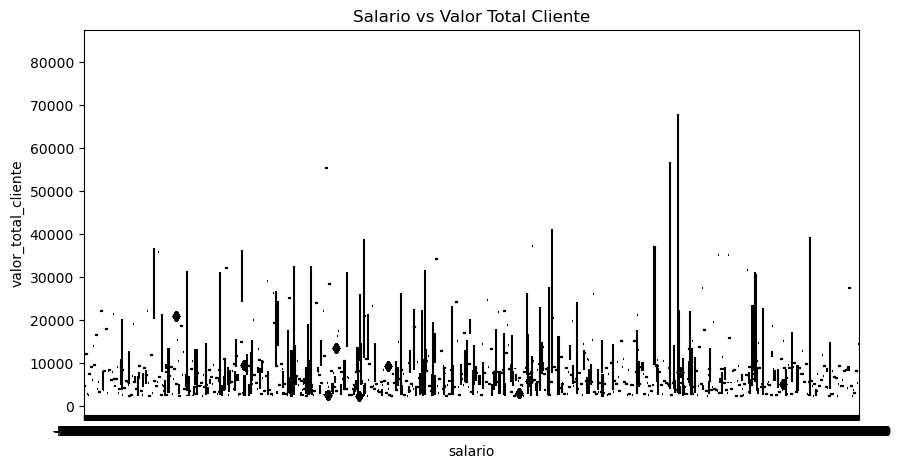

In [30]:
# Hipótesis 1 - Visualización
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='salario', y='valor_total_cliente',palette = "inferno")
plt.title('Salario vs Valor Total Cliente')
plt.show()

In [ ]:
# Hipótesis 1 - Visualización
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='salario', y='valor_total_cliente',palette = "inferno")
plt.title('Salario vs Valor Total Cliente')
plt.show()

In [23]:
# Hipótesis 2 - Visualización
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='salario', y='puntos_canjeados')
plt.title('Salario vs Puntos Canjeados')
plt.show()

# Hipótesis 3 - Distribución de salarios tras convertir los negativos a positivos
plt.figure(figsize=(10, 5))
sns.histplot(salarios_convertidos, bins=20)
plt.title('Distribución de Salarios Negativos Convertidos a Positivos')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x140414a40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# Voy a comparar el salario con los datos de la columna "valor total cliente"
# print(df[["salario","valor_total_cliente" ]].sample(20))
# print(df[num_negativos_suma,"valor_total_cliente"])
num_negativos = df["valor_total_cliente"] < 0
print (num_negativos)
df[["valor_total_cliente"] < 0].unique()

In [118]:
# Salario negativo - hipótesis 1
# ¿Valor_total_cliente también en negativo?
sn_hipotesis1 = df.loc[df["salario"]>0], ["valor_total_cliente"]
sn_hipotesis1
sn_hipotesis1 = df.loc[df["valor_total_cliente"]>0], ["salario"]
sn_hipotesis1

(        ID_fidelidad   ano  mes  total_vuelos_mes  vuelos_con_acompañantes  \
 0             100018  2017    1                 3                        0   
 1             100018  2017    2                 2                        2   
 2             100018  2018   10                 6                        4   
 3             100018  2017    4                 4                        0   
 4             100018  2017    5                 0                        0   
 ...              ...   ...  ...               ...                      ...   
 405619        999891  2018    8                 0                        0   
 405620        999891  2018    9                 0                        0   
 405621        999891  2018   10                 0                        0   
 405622        999891  2018   11                 0                        0   
 405623        999891  2018   12                 0                        0   
 
         total_vuelos  distancia_total_mes  puntos

In [ ]:
# 2.salario negativo relacionado con exceso de puntos canjeados

In [114]:
# ¿Podría ser que el salario negativo indique que ha canjeado demasiados puntos?
# Vamos a comprobarlo antes de imputar
# print(df[["salario","puntos_canjeados" ]].sample(25))
# negativos_salario = df[df['salario'] < 0] # Creo una variable con los salarios negativos.
# puntos_canjeados_mas = df[df["puntos_canjeados"]<0]


# muestras_negativas = negativos_salario[['salario', 'puntos_acumulados_mes', 'puntos_canjeados']]
muestras_negativas = negativos_salario[['salario']] ,puntos_canjeados_mas[[ 'puntos_acumulados_mes']], puntos_acumulados_mas[['puntos_canjeados']]
# Mostrar el resultado
print(muestras_negativas)
# assert (muestras_negativas['salario'] < 0).all(), "Hay valores positivos en la muestra"
# df[(condicion1) & (condicion2) | (condicion3)]



(        salario
6408   -10605.0
6409   -10605.0
6410   -10605.0
6411   -10605.0
6412   -10605.0
...         ...
387691 -46470.0
387692 -46470.0
387693 -46470.0
387694 -46470.0
387695 -46470.0

[480 rows x 1 columns],         puntos_acumulados_mes
2                       311.0
8                       420.0
13                      253.0
30                      354.0
45                      180.0
...                       ...
405525                   70.0
405546                  216.0
405567                  115.0
405594                   86.0
405603                  252.0

[24181 rows x 1 columns],         puntos_canjeados
0                      0
1                      0
2                    385
3                      0
5                      0
...                  ...
405581                 0
405582                 0
405583                 0
405594               361
405603               414

[207632 rows x 1 columns])


In [108]:
puntos_acumulados_mas = df[df["puntos_acumulados_mes"]>0]
print (puntos_acumulados_mas)


        ID_fidelidad   ano  mes  total_vuelos_mes  vuelos_con_acompañantes  \
0             100018  2017    1                 3                        0   
1             100018  2017    2                 2                        2   
2             100018  2018   10                 6                        4   
3             100018  2017    4                 4                        0   
5             100018  2017    6                 4                        1   
...              ...   ...  ...               ...                      ...   
405581        999788  2017    6                 5                        3   
405582        999788  2017    7                 7                        0   
405583        999788  2017    8                11                        0   
405594        999788  2017   10                 4                        3   
405603        999891  2017    1                 1                        1   

        total_vuelos  distancia_total_mes  puntos_acumulados_me

In [109]:
puntos_acumulados_mas.shape

(207632, 25)

In [71]:
valores_unicos = df["salario"].unique()
print(valores_unicos)

[92552.    nan 63253. ... 23160. 97206. 56345.]


In [112]:
puntos_canjeados_mas = df[df["puntos_canjeados"]>0]
puntos_canjeados_mas.shape

(24181, 25)

In [ ]:
df[["puntos_acumulados_mes"]] = df[['puntos_acumulados_mes']].astype(int)

In [ ]:
# 3. Salario negativo - ipótesis 3
# Error en la transcripción (solucionable con pasarlo a positivo)

In [ ]:
# Los nulos en el salario. Considero que el salario es un dato relevante asi que voy a imputarlo.
# Entiendo que el salario tiene que ver con el trabajo que uno hace y este está relacionado también con el nivel de estudios, y
# y otros datos de los que disponemos (genero, estado civil,valor_total_cliente incluso la provincia). 
# Entre los métodos de los que dispongo me parece que el más adecuado es Iterative Imputer ya que es 
# una técnica que utiliza un modelo de regresión para estimar los valores faltantes en nuestros datos.

In [28]:
# Unificar los datos - Voy a ir unificando y limpiando los datos susceptibles a ello.
# Pasar valores float a int
df[["puntos_acumulados_mes", 'baja_año', "baja_mes", "salario"]] = df[['puntos_acumulados_mes', 'baja_año', "baja_mes", "salario"]].astype(int)
# comprobamos
df.types()


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
## Replace: reemplazar valores en una columna
df['pdays'] = df['pdays'].replace(999, np.nan)

In [ ]:
# Map: aplicar una función a cada valor de una columna

df['loan'] = df['loan'].map({0.0: "No", 1.0: "Si"})
df.head()

In [ ]:
# Cuestión: datos mensuales excepto total_vuelos... 
# ¿tiene sentido mantenerlo si no sabemos si se actualiza o no, pudiendo consultar ese dato de otra forma?

In [ ]:
# Unificar tipos de datos y textos

In [ ]:
df2 = df.drop(columns=["title"])

In [15]:
df_cl.sample(10)
# para generar un nuevo csv. df_unido.to_csv("files/unido.csv")

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11928,819077,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,63952.0,Married,Star,2842.82,Standard,2015,5,NaN,NaN
15839,369646,Canada,Alberta,Peace River,T9O 2W2,Female,Master,85959.0,Divorced,Star,12168.74,Standard,2017,4,NaN,NaN
1654,215314,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,6277.01,Standard,2016,1,2016.0,3.0
10116,624216,Canada,Ontario,Toronto,M2M 7K8,Female,College,NaN,Single,Star,2310.88,Standard,2017,2,NaN,NaN
10430,427354,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,High School or Below,74537.0,Married,Star,2429.28,Standard,2017,12,NaN,NaN
5837,220244,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Nova,4446.74,Standard,2014,7,NaN,NaN
5415,261426,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,67680.0,Divorced,Nova,3788.65,Standard,2017,7,2018.0,3.0
14513,246722,Canada,Ontario,Toronto,P1L 8X8,Male,Bachelor,64680.0,Married,Star,7285.03,Standard,2017,9,NaN,NaN
16274,148753,Canada,Quebec,Montreal,H2Y 4R4,Male,College,NaN,Divorced,Star,17497.52,Standard,2016,4,NaN,NaN
16702,465347,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,NaN,Married,Star,38055.21,Standard,2015,8,NaN,NaN
